# Huấn luyện, lựa chọn, kiểm thử mô hình

** Import thư viện **

In [1]:
!pip install category_encoders
!pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.8 MB/s eta 0:00:00


## Đọc dữ liệu

** Import thư viện **

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

** Kết nối Colab **

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/DS/CK_KHDL/Clean Data

Mounted at /content/drive
/content/drive/MyDrive/DS/CK_KHDL/Clean Data


** Đọc dữ liệu và kiểm tra thông tin của dữ liệu **

In [4]:
# Đọc dữ liệu từ file train
file = "clean_data_train.csv"
data = pd.read_csv(file)

In [5]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11087 entries, 0 to 11086
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          11087 non-null  object 
 1   Author         11087 non-null  object 
 2   Rating         11087 non-null  float64
 3   ReviewCount    11087 non-null  int64  
 4   RatingCount    11087 non-null  int64  
 5   Genres         11087 non-null  object 
 6   Series         11087 non-null  object 
 7   Awards         11087 non-null  int64  
 8   Pages          11087 non-null  float64
 9   PublishedYear  11087 non-null  float64
 10  RatingLabel    11087 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 952.9+ KB


,Title,Author,Rating,ReviewCount,RatingCount,Genres,Series,Awards,Pages,PublishedYear,RatingLabel
0,Welcome to Night Vale,Joseph Fink,3.83,6007,42859,Fantasy,Welcome to Night Vale,2,401.0,2015.0,Medium
1,Raise The Titanic!,Clive Cussler,3.99,1078,29456,Fiction,Dirk Pitt®,0,384.0,1976.0,Medium
2,Conduit,Angie Martin,3.98,139,527,Mystery,Emily Monroe,0,354.0,2014.0,Medium
3,Nevermoor: The Trials of Morrigan Crow,Jessica Townsend,4.32,11092,71458,Fantasy,Nevermoor,7,465.0,2017.0,High
4,Personal,Lee Child,3.99,4737,80736,Thriller,Jack Reacher,4,353.0,2014.0,Medium


## Mã hóa dữ liệu

** Mã hóa Author bằng Frequency Encoding **

In [6]:
# Mã hoá Frequency Encoding cho 'Author'
author_freq = data['Author'].value_counts(normalize=True)
data['AuthorEncoded'] = data['Author'].map(author_freq)

data['AuthorEncoded'].head()

,AuthorEncoded
0,0.000180
1,0.000722
2,0.000090
3,0.000271
4,0.001624


** Mã hóa Genres bằng Frequency Encoding **

In [7]:
# # Mã hoá Frequency Encoding cho 'Genres'
# genres_freq = data['Genres'].value_counts(normalize=True)
# data['GenresEncoded'] = data['Genres'].map(genres_freq)

# data['GenresEncoded'].head()

** Mã hóa Series bằng Frequency Encoding **

In [8]:

# Mã hoá Frequency Encoding cho 'Series'
series_freq = data['Series'].value_counts(normalize=True)
data['SeriesEncoded'] = data['Series'].map(series_freq)

data['SeriesEncoded'].head()


,SeriesEncoded
0,0.000180
1,0.000631
2,0.000090
3,0.000271
4,0.001624


In [9]:
data.head()

,Title,Author,Rating,ReviewCount,RatingCount,Genres,Series,Awards,Pages,PublishedYear,RatingLabel,AuthorEncoded,SeriesEncoded
0,Welcome to Night Vale,Joseph Fink,3.83,6007,42859,Fantasy,Welcome to Night Vale,2,401.0,2015.0,Medium,0.000180,0.000180
1,Raise The Titanic!,Clive Cussler,3.99,1078,29456,Fiction,Dirk Pitt®,0,384.0,1976.0,Medium,0.000722,0.000631
2,Conduit,Angie Martin,3.98,139,527,Mystery,Emily Monroe,0,354.0,2014.0,Medium,0.000090,0.000090
3,Nevermoor: The Trials of Morrigan Crow,Jessica Townsend,4.32,11092,71458,Fantasy,Nevermoor,7,465.0,2017.0,High,0.000271,0.000271
4,Personal,Lee Child,3.99,4737,80736,Thriller,Jack Reacher,4,353.0,2014.0,Medium,0.001624,0.001624


** Lựa chọn các đặc trưng đã chọn và chuẩn hoá dữ liệu **

In [10]:
# Các đặc trưng số học cần scale
numeric_features = ['Rating', 'ReviewCount', 'RatingCount', 'Pages']
encoded_features = ['AuthorEncoded', 'SeriesEncoded']

# Chuẩn hóa toàn bộ đặc trưng
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[numeric_features + encoded_features])
X_train = pd.DataFrame(X_scaled, columns=[f"{col}Scaled" for col in numeric_features + encoded_features])

** Kiểm tra kích thước các tập con **

In [11]:
print(f"Kích thước tập huấn luyện: {X_train.shape}")

Kích thước tập huấn luyện: (11087, 6)


** Trực quan dữ liệu bằng PCA 3D **

In [12]:
from sklearn.decomposition import PCA
import plotly.express as px
import pandas as pd

# Giả sử bạn đã có X_train là dataframe
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_train)

# Chuyển thành DataFrame để dùng Plotly
df_pca = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])

# Vẽ biểu đồ Plotly 3D
fig = px.scatter_3d(
    df_pca, x='PC1', y='PC2', z='PC3',
    opacity=0.6,
    color_discrete_sequence=['skyblue'],
    title="PCA 3D - Trực quan hóa dữ liệu",
)

fig.update_traces(marker=dict(size=4))
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()


** Trực quan dữ liệu bằng t-SNE **

In [13]:
from sklearn.manifold import TSNE
import pandas as pd
import plotly.express as px

# Giả sử X_train là dữ liệu đã chuẩn hoá

tsne = TSNE(n_components=3, perplexity=30, random_state=42, max_iter=1000)
X_tsne_3d = tsne.fit_transform(X_train)

# Chuyển sang DataFrame
df_tsne_3d = pd.DataFrame(X_tsne_3d, columns=['TSNE1', 'TSNE2', 'TSNE3'])

# Vẽ tương tác 3D với Plotly
fig = px.scatter_3d(df_tsne_3d, x='TSNE1', y='TSNE2', z='TSNE3',
                    opacity=0.7, color_discrete_sequence=['skyblue'],
                    title='t-SNE 3D - Trực quan hóa dữ liệu')
fig.update_traces(marker=dict(size=4))
fig.show()


## Lựa chọn mô hình học máy

### Spectral Clustering

##### 1. Tổng quan lý thuyết

Spectral Clustering là thuật toán phân cụm dựa trên lý thuyết đồ thị. Thay vì phân cụm trực tiếp trên dữ liệu gốc, nó chuyển dữ liệu sang không gian đặc trưng (spectral space) bằng cách dùng vector riêng của ma trận Laplacian rồi phân cụm bằng K-Means.

##### 2. Các siêu tham số quan trọng

- **`n_clusters`**:  
  Số lượng cụm cần phân chia.  
  → Giá trị càng lớn, mô hình cố gắng tách dữ liệu thành nhiều cụm hơn. Cần chọn phù hợp bằng các chỉ số như Silhouette Score.

- **`eigen_solver`**:  
  Phương pháp giải trị riêng (eigen decomposition). Các giá trị: 'arpack', 'lobpcg', 'amg', None.  
  → Ảnh hưởng hiệu suất và độ chính xác trong bước tính vector riêng. Thường để None để tự chọn tối ưu.

- **`n_init`**:  
  Số lần chạy thuật toán gán nhãn (assign_labels='kmeans') với các khởi tạo khác nhau.  
  → Chọn lớn hơn 1 để tránh rơi vào nghiệm cục bộ.

- **`affinity`**:  
  Cách xây dựng ma trận tương đồng giữa các điểm.  
  → Chọn phù hợp với đặc trưng dữ liệu (dữ liệu thưa → dùng cosine, dữ liệu số → rbf)

- **`n_neighbors`**:  
  Số lượng láng giềng gần nhất để kết nối đồ thị.
  → Nếu quá nhỏ thì đồ thị rời rạc, quá lớn thì mất chi tiết cục bộ. Giá trị thường từ 5–15.

- **`assign_labels`**:
  Cách gán nhãn sau khi chiếu dữ liệu vào không gian spectral.


##### 3. Hàm mục tiêu (Loss Function)

##### 4. Huấn luyện

** Tìm tham số k tốt nhất **

n_clusters = 2, Silhouette Score = 0.2691
n_clusters = 3, Silhouette Score = 0.2733
n_clusters = 4, Silhouette Score = 0.1830
n_clusters = 5, Silhouette Score = 0.2023
n_clusters = 6, Silhouette Score = 0.2441
n_clusters = 7, Silhouette Score = 0.2626
n_clusters = 8, Silhouette Score = 0.2259
n_clusters = 9, Silhouette Score = 0.2110
n_clusters = 10, Silhouette Score = 0.2122


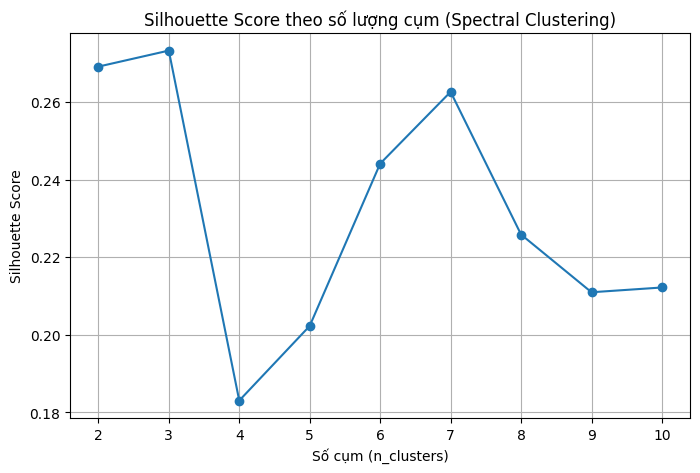

In [14]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    spectral = SpectralClustering(
        n_clusters=k,
        affinity='nearest_neighbors',
        n_neighbors=10,
        assign_labels='kmeans',
        random_state=42
    )
    labels = spectral.fit_predict(X_train)
    score = silhouette_score(X_train, labels)
    sil_scores.append(score)
    print(f"n_clusters = {k}, Silhouette Score = {score:.4f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(k_range, sil_scores, marker='o')
plt.title('Silhouette Score theo số lượng cụm (Spectral Clustering)')
plt.xlabel('Số cụm (n_clusters)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

** Huấn luyện với best k **

In [15]:
best_k = k_range[sil_scores.index(max(sil_scores))]
print(f"\nSố cụm tối ưu (Silhouette cao nhất): {best_k}")

spectral = SpectralClustering(
    n_clusters=best_k,
    affinity='nearest_neighbors',
    n_neighbors=10,
    assign_labels='kmeans',
    random_state=42
)
labels = spectral.fit_predict(X_train)
data['Cluster'] = labels



Số cụm tối ưu (Silhouette cao nhất): 3


** Phân tích thể loại từng cụm **

In [16]:
from collections import Counter
data['GenresList'] = data['Genres'].str.split('|')

print("\nPhân tích thể loại phổ biến trong từng cụm:")
for i in range(best_k):
    cluster_genres = data[data['Cluster'] == i]['GenresList'].explode()
    top_genres = Counter(cluster_genres).most_common(10)
    print(f"\n--- Cụm {i} ---")
    for genre, count in top_genres:
        print(f"{genre}: {count}")


Phân tích thể loại phổ biến trong từng cụm:

--- Cụm 0 ---
Fiction: 1377
Nonfiction: 742
Historical Fiction: 489
Romance: 343
Young Adult: 255
Fantasy: 203
Thriller: 197
Classics: 191
Horror: 174
History: 153

--- Cụm 1 ---
Fantasy: 1430
Romance: 772
Mystery: 495
Young Adult: 412
Fiction: 331
Historical Fiction: 231
Science Fiction: 194
Thriller: 135
Urban Fantasy: 114
Horror: 85

--- Cụm 2 ---
Mystery: 57
Horror: 32
Fiction: 7
Young Adult: 7
Fantasy: 6
Romance: 3
Nonfiction: 1
Thriller: 1


** Biểu đồ tròn **

In [17]:
import plotly.express as px

for i in range(best_k):
    cluster_genres = data[data['Cluster'] == i]['GenresList'].explode()
    genre_counts = Counter(cluster_genres)
    top_genres = genre_counts.most_common(10)
    genre_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

    fig = px.pie(
        genre_df,
        names='Genre',
        values='Count',
        title=f"Cụm {i} – Tỉ lệ % thể loại phổ biến",
        hole=0.3
    )
    fig.show()


** Trực quan dữ liệu bằng t-SNE **

In [18]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_train)

tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2', 'TSNE3'])
tsne_df['Cluster'] = data['Cluster'].astype(str)
tsne_df['Title'] = data['Title']
tsne_df['Author'] = data['Author']
tsne_df['Genres'] = data['Genres']
tsne_df['Rating'] = data['Rating']

import plotly.express as px
fig = px.scatter_3d(
    tsne_df,
    x='TSNE1',
    y='TSNE2',
    z='TSNE3',
    color='Cluster',
    title="Spectral Clustering - tSNE 3D Visualization",
    hover_data=['Title', 'Author', 'Genres', 'Rating']
)
fig.update_traces(marker=dict(size=5))
fig.update_layout(scene=dict(
    xaxis_title="t-SNE 1",
    yaxis_title="t-SNE 2",
    zaxis_title="t-SNE 3"
))
fig.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



** Tổng hợp đánh giá sau khi phân cụm**

In [19]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

sil_score = silhouette_score(X_train, labels)
chi_score = calinski_harabasz_score(X_train, labels)
dbi_score = davies_bouldin_score(X_train, labels)

print("\n=== Evaluation Metrics ===")
print(f"Silhouette Score          : {sil_score:.4f}  (Cao hơn là tốt)")
print(f"Calinski-Harabasz Index   : {chi_score:.2f}  (Cao hơn là tốt)")
print(f"Davies-Bouldin Index      : {dbi_score:.4f}  (Thấp hơn là tốt)")



=== Evaluation Metrics ===
Silhouette Score          : 0.2733  (Cao hơn là tốt)
Calinski-Harabasz Index   : 1816.43  (Cao hơn là tốt)
Davies-Bouldin Index      : 1.3127  (Thấp hơn là tốt)


### HDBSCAN (Hierarchical DBSCAN)

##### 1. Tổng quan lý thuyết

##### 2. Các siêu tham số quan trọng

##### 3. Hàm mục tiêu (Loss Function)

##### 4. Huấn luyện

In [20]:
import hdbscan

# Huấn luyện HDBSCAN
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=100,       # Số lượng sách tối thiểu trong 1 cụm
    metric='euclidean',
    cluster_selection_method='eom'
)

labels = clusterer.fit_predict(X_train)

# Gán nhãn vào DataFrame
data['Cluster'] = labels


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



** Phân tích thể loại từng cụm **

In [21]:
print("\n=== Số lượng sách mỗi cụm ===")
print(data['Cluster'].value_counts())

print("\n=== Top thể loại trong từng cụm ===")
for cluster_id in sorted(data['Cluster'].unique()):
    if cluster_id == -1:
        print(f"\nCluster -1 (Noise): {data[data['Cluster'] == -1].shape[0]} sách")
        continue

    print(f"\nCluster {cluster_id}:")
    genres_counts = data[data['Cluster'] == cluster_id]['Genres'].value_counts().head(5)
    print(genres_counts)



=== Số lượng sách mỗi cụm ===
Cluster
 1    5381
 0    5119
-1     587
Name: count, dtype: int64

=== Top thể loại trong từng cụm ===

Cluster -1 (Noise): 587 sách

Cluster 0:
Genres
Fantasy        1332
Romance         736
Mystery         492
Young Adult     392
Fiction         311
Name: count, dtype: int64

Cluster 1:
Genres
Fiction               1314
Nonfiction             726
Historical Fiction     482
Romance                332
Young Adult            247
Name: count, dtype: int64


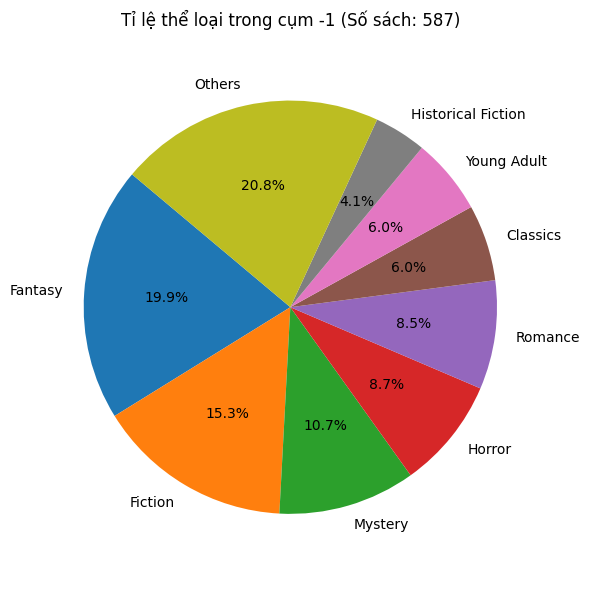

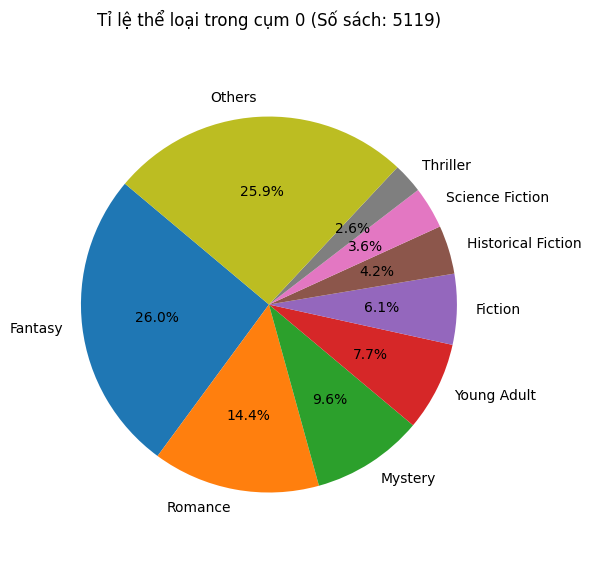

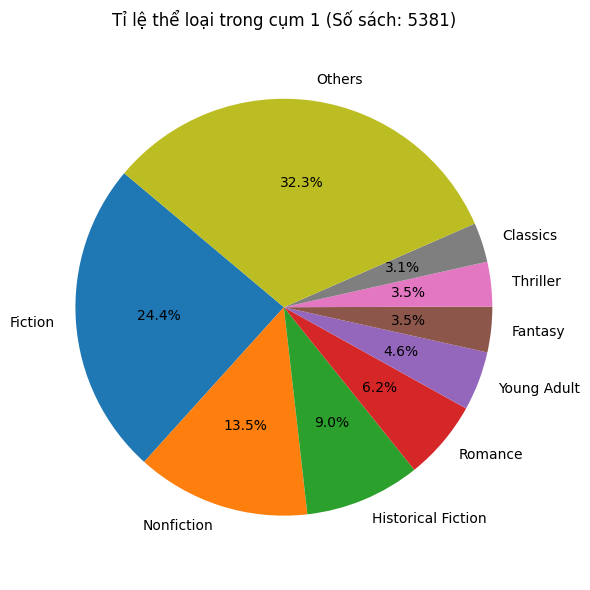

In [22]:
import matplotlib.pyplot as plt
from collections import Counter

data['GenresList'] = data['Genres'].str.split('|')

# Vẽ biểu đồ tròn thể loại theo từng cụm
for cluster_id in sorted(data['Cluster'].unique()):
    cluster_data = data[data['Cluster'] == cluster_id]
    genres_exploded = cluster_data['GenresList'].explode()

    genre_counts = Counter(genres_exploded)
    total = sum(genre_counts.values())

    # Lấy top 8 thể loại, còn lại gộp vào Others
    top_genres = genre_counts.most_common(8)
    top_total = sum(count for _, count in top_genres)
    others = total - top_total

    labels = [genre for genre, _ in top_genres]
    sizes = [count / total * 100 for _, count in top_genres]

    if others > 0:
        labels.append('Others')
        sizes.append(others / total * 100)

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Tỉ lệ thể loại trong cụm {cluster_id} (Số sách: {len(cluster_data)})')
    plt.axis('equal')  # Đảm bảo hình tròn
    plt.tight_layout()
    plt.show()


** Trực quan kết quả bàng t-SNE**

In [23]:
from sklearn.manifold import TSNE
import plotly.express as px

# t-SNE
tsne = TSNE(n_components=3, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_train)

# Tạo DataFrame t-SNE
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2', 'TSNE3'])
tsne_df['Cluster'] = data['Cluster'].astype(str)
tsne_df['Title'] = data['Title']
tsne_df['Author'] = data['Author']
tsne_df['Genres'] = data['Genres']
tsne_df['Rating'] = data['Rating']

# Vẽ bằng Plotly
fig = px.scatter_3d(
    tsne_df, x='TSNE1', y='TSNE2', z='TSNE3',
    color='Cluster',
    hover_data=['Title', 'Author', 'Genres', 'Rating'],
    title='HDBSCAN - t-SNE 3D Visualization'
)
fig.update_traces(marker=dict(size=5))
fig.update_layout(scene=dict(
    xaxis_title="t-SNE 1", yaxis_title="t-SNE 2", zaxis_title="t-SNE 3"
))
fig.show()


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



** Đánh giá kết quả phân cụm **

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Lọc các điểm không phải noise
mask = labels != -1
X_valid = X_train[mask]
valid_labels = labels[mask]

# Tính metric
sil_score = silhouette_score(X_valid, valid_labels)
chi_score = calinski_harabasz_score(X_valid, valid_labels)
dbi_score = davies_bouldin_score(X_valid, valid_labels)

print("\n=== Evaluation Metrics (không tính noise) ===")
print(f"Silhouette Score        : {sil_score:.4f}")
print(f"Calinski-Harabasz Index : {chi_score:.2f}")
print(f"Davies-Bouldin Index    : {dbi_score:.4f}")


## Kiểm thử mô hình và đánh giá kết quả

### Model1

** Đánh giá trên tập test **

### MLP

** Đánh giá trên tập test **

## Kết luận